In [1]:
import pandas as pd #to load and manipulate data
import numpy as np
import matplotlib.pyplot as plt #to draw graphs 
import seaborn as sns #to draw graphs 
from sklearn.model_selection import train_test_split #to split data into training and testing sets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix #to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix  #to draw a confusion matrix
from sklearn.metrics import accuracy_score, precision_score, classification_report, recall_score, f1_score, fbeta_score, make_scorer, confusion_matrix, precision_recall_curve #to plot score information
from warnings import filterwarnings
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
#df = pd.read_csv(r"/Users/lucapennella/Desktop/Smart Ponzi/Dataset/Dataset.csv")
df = pd.read_csv(r"/Users/lucapennella/Desktop/Smart Ponzi/bytecode_decode.csv")
tr = pd.read_csv(r"/Users/lucapennella/Desktop/Smart Ponzi/Dataset/Target.csv")

In [3]:
tr.head()

target
0       1
1       1
2       1
3       1
4       1

In [4]:
df.head()

address    balance  lifetime  tx_in  \
0  0x01680dc54cf0942bcabc1d6c955007e180ed4dd1    0.00950         0      5   
1  0xa38feb7b0aaad949a1b99ff516d4e3ea2e317bbf    0.00000         0     49   
2  0x020522bf9b8ed6ff41e2fa6765a17e20e2767d64  400.00001       804     27   
3  0x020e0638aa7d98b40d2a3a7ebd37ebdfc5cba2fd    0.00600        37    442   
4  0x0217495d71d7246205bc1b1039dad814d0c0c192    0.00000         1    144   

   tx_out  investment_in  payment_out  investment_to_contract/tx_in  \
0      11              4           11                        0.8000   
1     135             48          135                        0.9796   
2      58             25           58                        0.9259   
3     474            422          474                        0.9548   
4     711            135          711                        0.9375   

   payment_from_contract/tx_out  #addresses_paying_contract  ...  \
0                           1.0                           2  ...   
1                           1.0                          11  ...   
2                           1.0                          22  ...   
3                           1.0                          51  ...   
4                           1.0                          62  ...   

   SELFDESTRUCT  SIGNEXTEND  CHAINID  DIFFICULTY  CREATE2  MULMOD  COINBASE  \
0           NaN         NaN      NaN         NaN      NaN     NaN       NaN   
1           NaN         NaN      NaN         NaN      NaN     NaN       NaN   
2           NaN         NaN      NaN         NaN      NaN     NaN       NaN   
3           NaN         NaN      NaN         NaN      NaN     NaN       NaN   
4           NaN         NaN      NaN         NaN      NaN     NaN       NaN   

   CREATE  ADDMOD  SLT  
0     NaN     NaN  NaN  
1     NaN     NaN  NaN  
2     NaN     NaN  NaN  
3     NaN     NaN  NaN  
4     NaN     NaN  NaN  

[5 rows x 106 columns]

In [84]:
print('N. of rows: {}'.format(df.shape[0]))
print('N. of columns: {}'.format(df.shape[1]))

N. of rows: 4422
N. of columns: 106


In [85]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4422 entries, 0 to 4421
Data columns (total 106 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    address                       4422 non-null   object 
 1    balance                       4422 non-null   float64
 2    lifetime                      4422 non-null   int64  
 3    tx_in                         4422 non-null   int64  
 4    tx_out                        4422 non-null   int64  
 5    investment_in                 4422 non-null   int64  
 6    payment_out                   4422 non-null   int64  
 7    investment_to_contract/tx_in  4422 non-null   float64
 8    payment_from_contract/tx_out  4422 non-null   float64
 9    #addresses_paying_contract    4422 non-null   int64  
 10   #addresses_paid_by_contract   4422 non-null   int64  
 11   mean_v1                       4422 non-null   float64
 12   sdev_v1                       4422 non-null   

In [6]:
df = df.fillna(0)

In [63]:
df.describe()

balance     lifetime         tx_in        tx_out  investment_in  \
count  4.422000e+03  4422.000000   4422.000000   4422.000000    4422.000000   
mean   8.297772e+02   253.754184   1726.028042    187.258933     177.863184   
std    4.105474e+04   445.664867   3373.730293   1049.945813     884.673157   
min   -2.587792e+01   -12.000000      1.000000      0.000000       0.000000   
25%    0.000000e+00     1.000000      5.000000      0.000000       0.000000   
50%    0.000000e+00    39.000000     33.000000      0.000000       1.000000   
75%    0.000000e+00   229.750000    764.250000      5.000000       9.000000   
max    2.711505e+06  2358.000000  19485.000000  10000.000000   14050.000000   

       payment_out  investment_to_contract/tx_in  \
count  4422.000000                   4422.000000   
mean    170.712121                      0.245858   
std     985.055166                      0.330519   
min       0.000000                      0.000000   
25%       0.000000                      0.000000   
50%       0.000000                      0.000600   
75%       4.750000                      0.500000   
max    9998.000000                      1.000000   

       payment_from_contract/tx_out  #addresses_paying_contract  \
count                   4422.000000                 4422.000000   
mean                       0.437820                   69.220036   
std                        0.491178                  399.141806   
min                        0.000000                    0.000000   
25%                        0.000000                    0.000000   
50%                        0.000000                    1.000000   
75%                        1.000000                    4.000000   
max                        1.000000                 7522.000000   

       #addresses_paid_by_contract  ...  SELFDESTRUCT  SIGNEXTEND     CHAINID  \
count                  4422.000000  ...    805.000000  358.000000  323.000000   
mean                     27.788105  ...      1.329193    2.131285    1.284830   
std                     361.418833  ...      3.741618    7.693868    1.235846   
min                       0.000000  ...      1.000000    1.000000    1.000000   
25%                       0.000000  ...      1.000000    1.000000    1.000000   
50%                       0.000000  ...      1.000000    1.000000    1.000000   
75%                       1.000000  ...      1.000000    1.000000    1.000000   
max                    9635.000000  ...     99.000000   77.000000   19.000000   

       DIFFICULTY     CREATE2      MULMOD    COINBASE      CREATE      ADDMOD  \
count  470.000000  579.000000  312.000000  456.000000  551.000000  396.000000   
mean     1.248936    1.599309    1.163462    1.377193    1.270417    1.151515   
std      0.738630    0.716875    0.509282    1.512674    0.650465    0.405372   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
50%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
75%      1.000000    2.000000    1.000000    1.000000    1.000000    1.000000   
max     10.000000    4.000000    5.000000   28.000000    6.000000    3.000000   

              SLT  
count  515.000000  
mean     2.603883  
std      4.965482  
min      1.000000  
25%      1.000000  
50%      1.000000  
75%      1.000000  
max     39.000000  

[8 rows x 105 columns]

In [65]:
df['target'].value_counts(normalize=True)

0    0.847806
1    0.152194
Name: target, dtype: float64

In [66]:
df['target'].value_counts()

0    3749
1     673
Name: target, dtype: int64

In [67]:
df['SELFDESTRUCT'].value_counts()

1.0     718
2.0      74
3.0       6
24.0      3
4.0       2
7.0       1
99.0      1
Name: SELFDESTRUCT, dtype: int64

In [69]:
int_cols = df.select_dtypes('int64')
float_cols = df.select_dtypes('float64')

In [70]:
int_cols.shape

(4422, 12)

In [71]:
df['lifetime'].head(100)

0       0
1       0
2     804
3      37
4       1
     ... 
95      0
96      1
97      0
98      4
99     13
Name: lifetime, Length: 100, dtype: int64

In [13]:
df['balance'].head(100)

0       0.00950
1       0.00000
2     400.00001
3       0.00600
4       0.00000
        ...    
95      0.00000
96      0.00000
97      0.00000
98      0.00000
99      0.00000
Name: balance, Length: 100, dtype: float64

In [14]:
df['balance'].value_counts(normalize=True)

0.000000      0.783130
0.010000      0.012664
0.100000      0.007915
0.001000      0.005427
1.000000      0.004297
                ...   
0.040897      0.000226
100.633469    0.000226
32.308765     0.000226
1.957599      0.000226
168.707520    0.000226
Name: balance, Length: 662, dtype: float64

<AxesSubplot:xlabel='balance', ylabel='Count'>

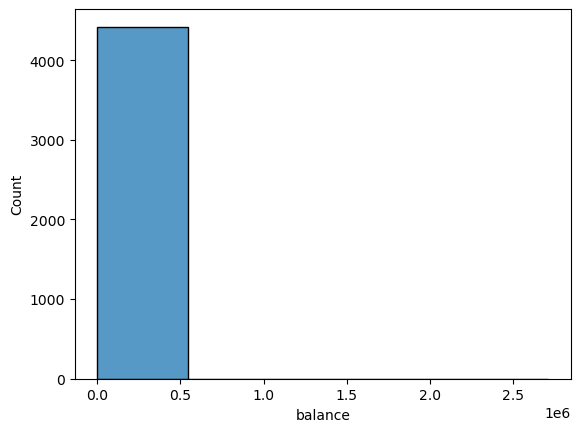

In [15]:
sns.histplot(data=df, x="balance", bins= 5)

<AxesSubplot:xlabel='balance', ylabel='Count'>

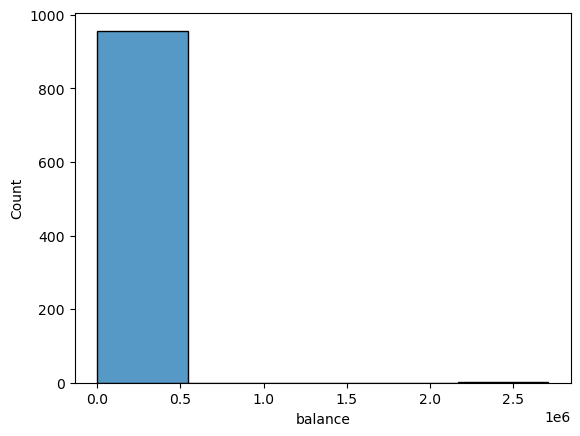

In [16]:
#sns.histplot(data=df[df["balance"]>0], x= 'balance' , bins= 5)

[Text(0.5, 1.0, 'Lifetime')]

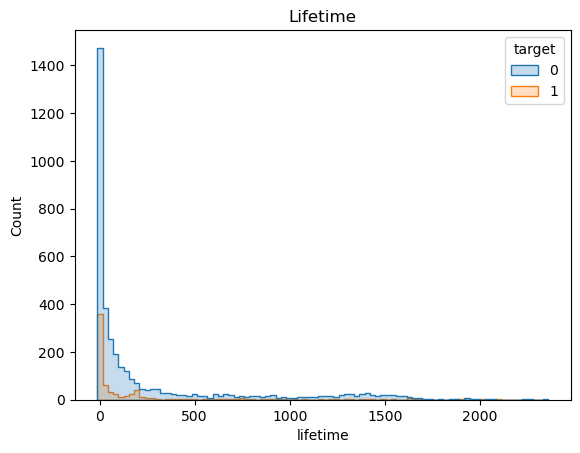

In [17]:
sns.histplot(data=df, x="lifetime", hue = 'target' , element="step").set(title='Lifetime')

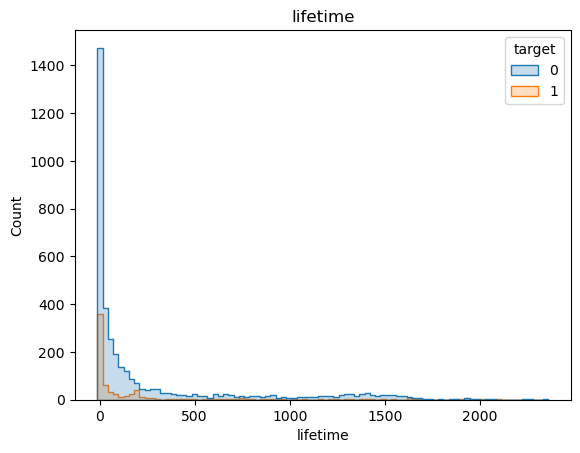

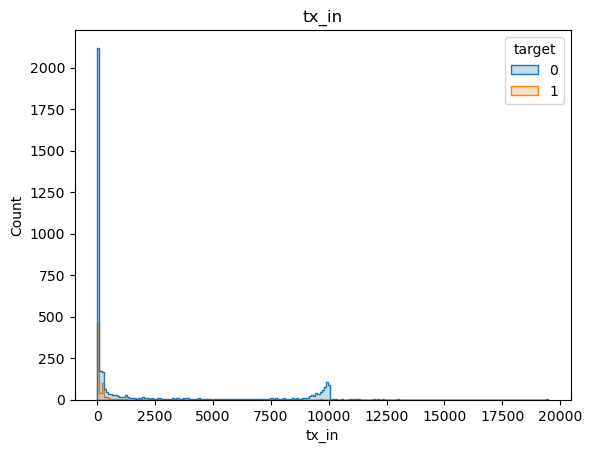

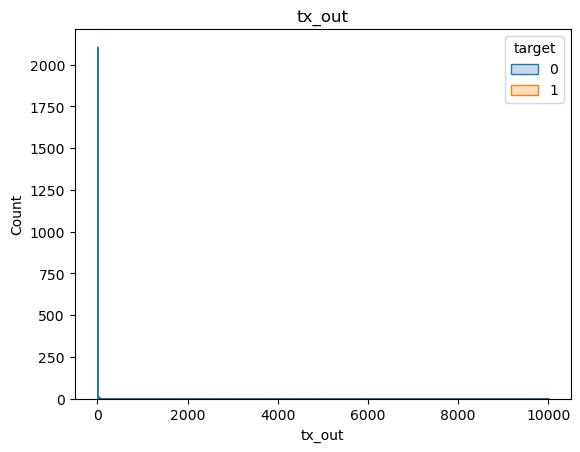

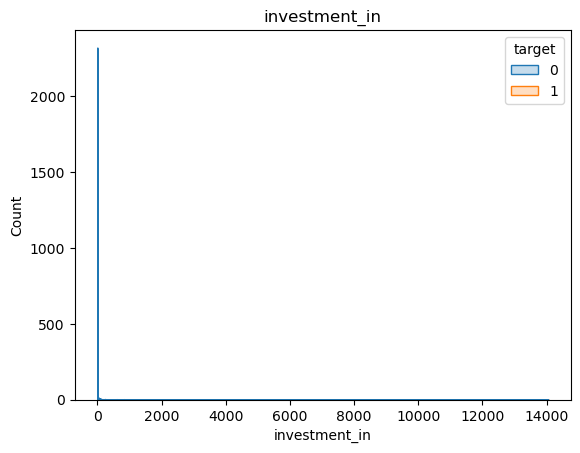

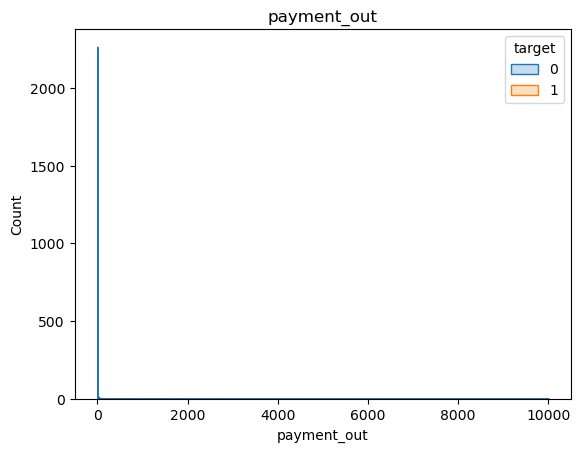

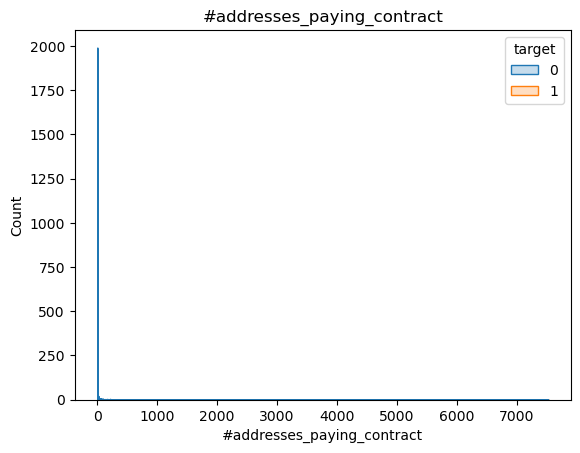

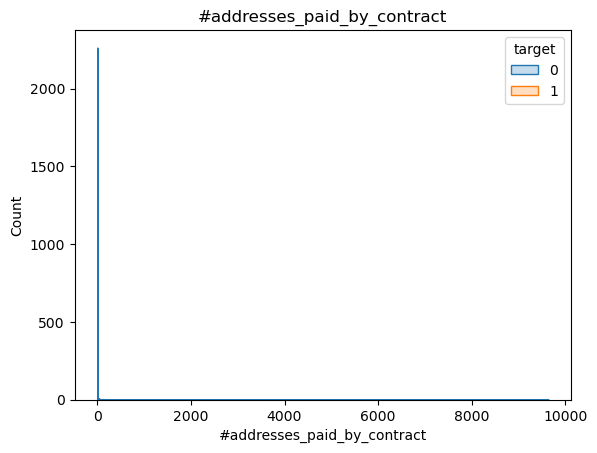

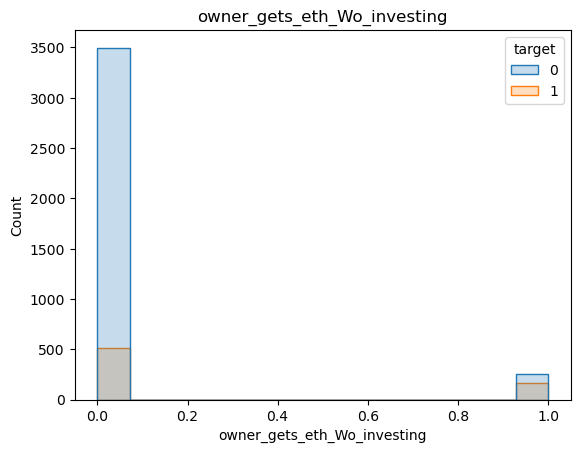

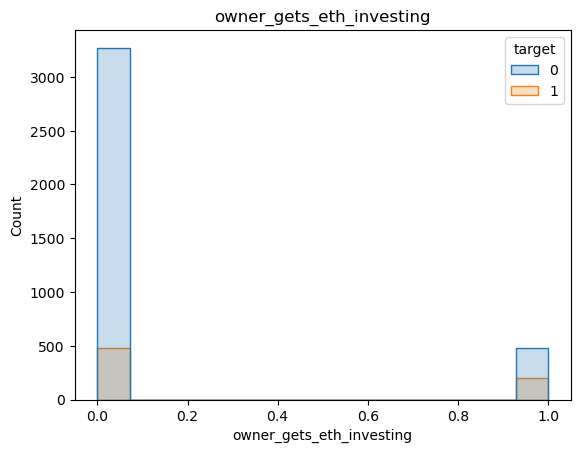

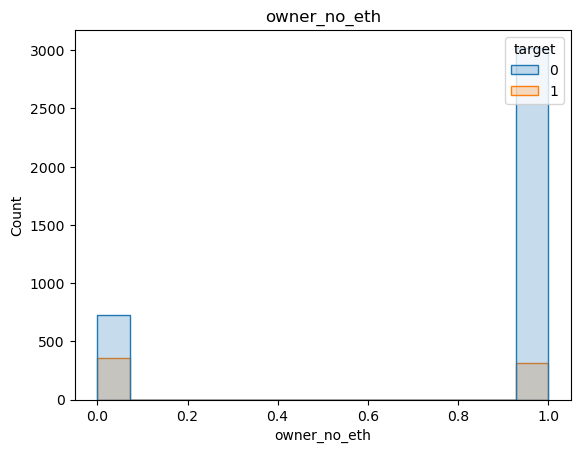

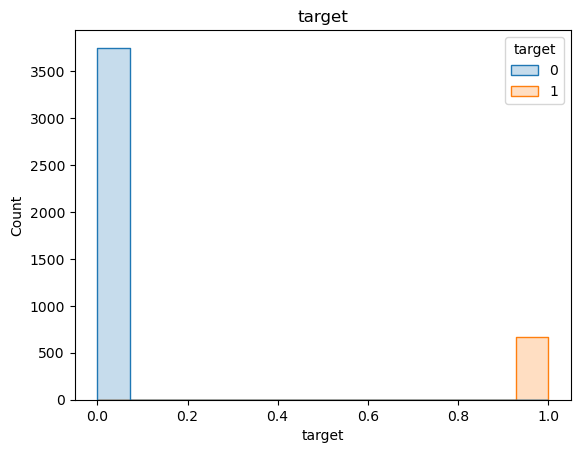

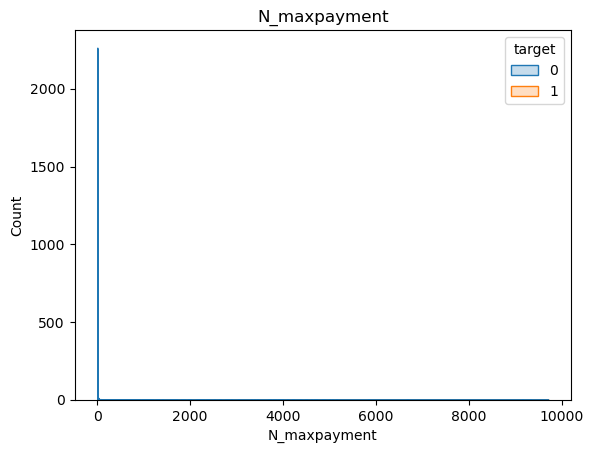

In [18]:
#for cl in int_cols:
#    sns.histplot(data=df, x=cl, hue = 'target' , element="step").set(title=cl)
#    plt.show()

In [19]:
#for cl in float_cols:
#    sns.histplot(data=df, x=cl, hue = 'target' , element="step").set(title=cl)
#    plt.show()

In [20]:
all_features_names = {'balance': 'Balance',
 'lifetime': 'Lifetime',
 'tx_in': 'Tx_in',
 'tx_out': 'Tx_out',
 'investment_in': 'Investment_in',
 'payment_out': 'Payment_out',
 'investment_to_contract/tx_in': 'Investment_in/Tx_in',
 'payment_from_contract/tx_out': 'Payment_out/Tx_out',
 '#addresses_paying_contract': '#addresses_paying_contract',
 '#addresses_paid_by_contract': '#addresses_paid_by_contract',
 'mean_v1': 'Mean_v1',
 'sdev_v1': 'Sdev_v1',
 'mean_v2': 'Mean_v2',
 'sdev_v2': 'Sdev_v2',
 'paid_rate': 'Paid_rate',
 'paid_one': 'Paid_one',
 'percentage_some_tx_in': 'Percentage_some_tx_in',
 'sdev_tx_in': 'Sdev_tx_in',
 'percentage_some_tx_out': 'Percentage_some_tx_out',
 'sdev_tx_out': 'Sdev_tx_out',
 'known_rate': 'Known_rate',
 'owner_gets_eth_Wo_investing': 'Initiator_gets_eth_Wo_investing',
 'owner_gets_eth_investing': 'Initiator_gets_eth_investing',
 'owner_no_eth': 'Initiator_no_eth',
 'skew_v1': 'Skew_v1',
 'N_maxpayment': 'N_maxpayment',
 'skew_v2': 'Skew_v2'
}

In [21]:
df['address'].value_counts(normalize=False)

0x01680dc54cf0942bcabc1d6c955007e180ed4dd1    1
0x28297291aebef85bed1b15b9d5fca3146c6ebb3f    1
0x37d65ca0754f12c7eec1c86b0915fba9fcbda131    1
0xde88ec7b6ac36ed99865098bebbc7756b00aed6f    1
0x32bacc8b241fb172fee18bda32527126c6f3c5f7    1
                                             ..
0x91fe28b2e059cb89aab4c763fc059bdb73e6bdc8    1
0xbdfcdf0ad3c89df471808c687be20c169dffebd8    1
0xe26517A9967299453d3F1B48Aa005E6127e67210    1
0x31abbfe28890a515241F68C5c75958475174d2a2    1
0xffe8196bc259e8dedc544d935786aa4709ec3e64    1
Name: address, Length: 4422, dtype: int64

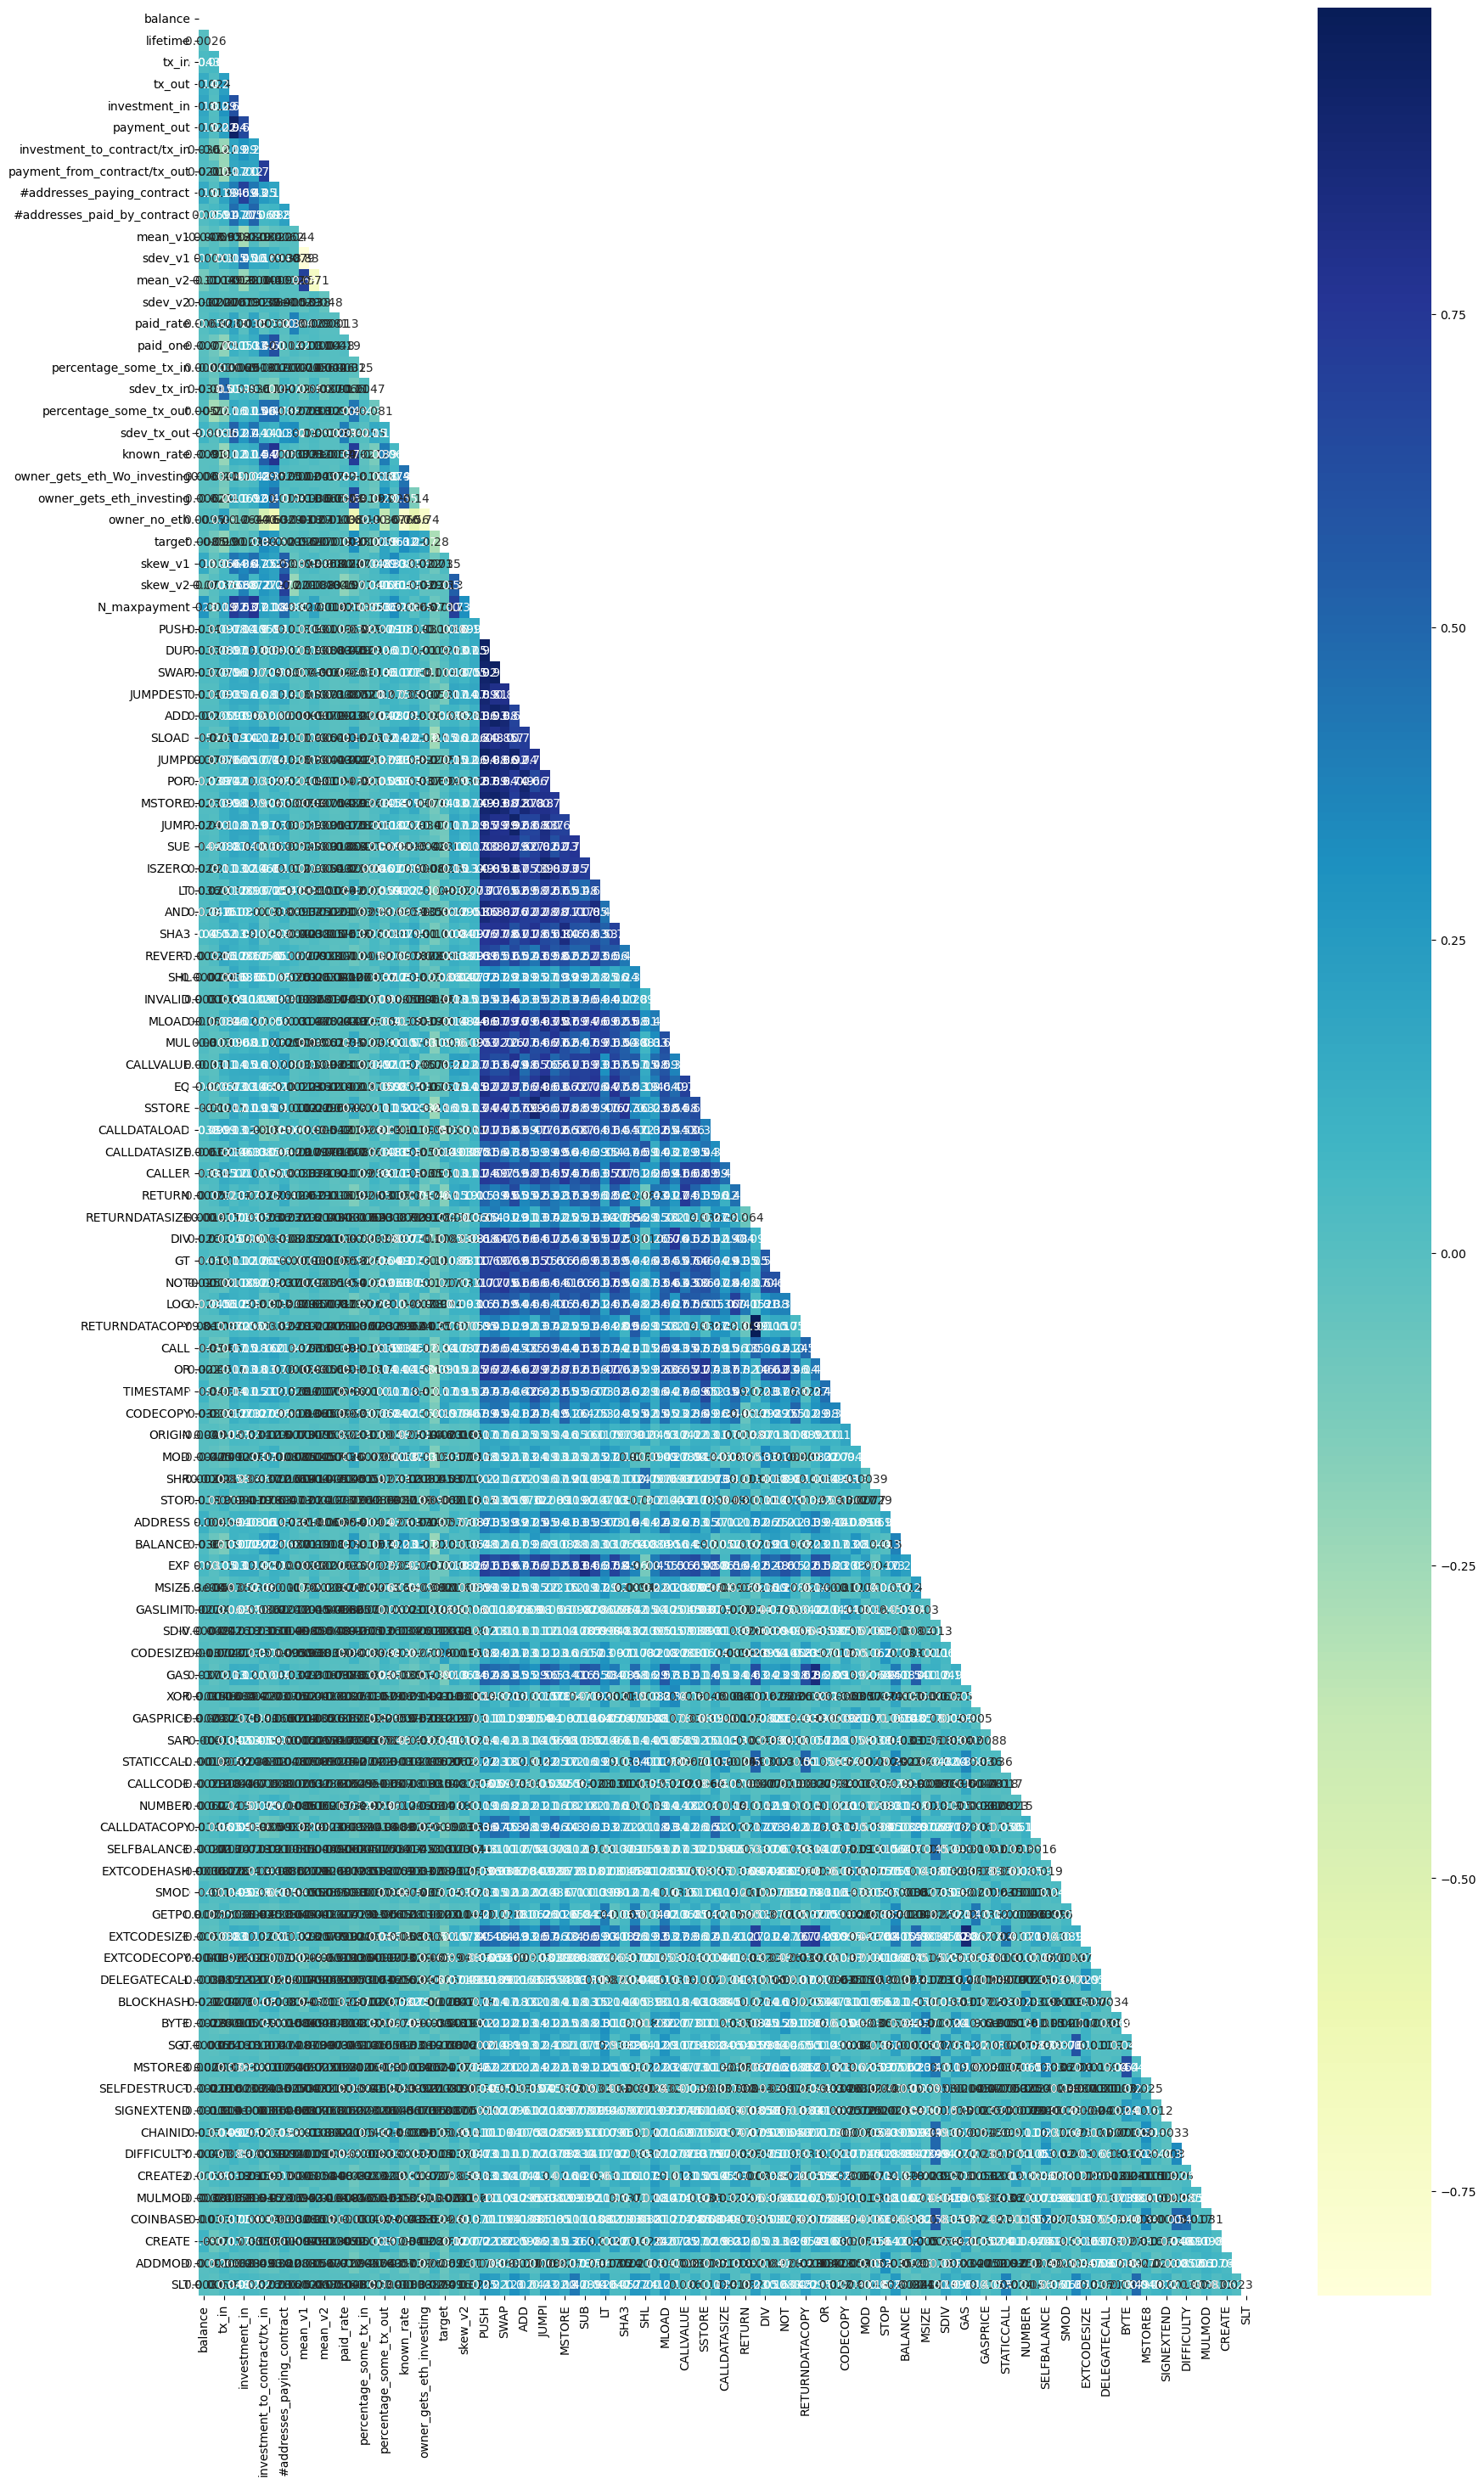

In [7]:
fig, ax = plt.subplots(figsize=(20,35))
matrix = np.triu(df.corr())
corr = df.corr()
corr_matrix = sns.heatmap(corr, annot=True, cmap="YlGnBu", mask = matrix)

In [8]:
corr_matrix = df.corr()
corr_matrix["target"].sort_values(ascending=True)

owner_no_eth                   -0.284794
tx_in                          -0.191900
RETURN                         -0.162514
CALLDATALOAD                   -0.146124
GAS                            -0.122172
                                  ...   
payment_from_contract/tx_out    0.249447
paid_one                        0.306787
known_rate                      0.319742
investment_to_contract/tx_in    0.322889
target                          1.000000
Name: target, Length: 105, dtype: float64

In [24]:
df.head()

address    balance  lifetime  tx_in  \
0  0x01680dc54cf0942bcabc1d6c955007e180ed4dd1    0.00950         0      5   
1  0xa38feb7b0aaad949a1b99ff516d4e3ea2e317bbf    0.00000         0     49   
2  0x020522bf9b8ed6ff41e2fa6765a17e20e2767d64  400.00001       804     27   
3  0x020e0638aa7d98b40d2a3a7ebd37ebdfc5cba2fd    0.00600        37    442   
4  0x0217495d71d7246205bc1b1039dad814d0c0c192    0.00000         1    144   

   tx_out  investment_in  payment_out  investment_to_contract/tx_in  \
0      11              4           11                        0.8000   
1     135             48          135                        0.9796   
2      58             25           58                        0.9259   
3     474            422          474                        0.9548   
4     711            135          711                        0.9375   

   payment_from_contract/tx_out  #addresses_paying_contract  ...  \
0                           1.0                           2  ...   
1                           1.0                          11  ...   
2                           1.0                          22  ...   
3                           1.0                          51  ...   
4                           1.0                          62  ...   

   percentage_some_tx_out  sdev_tx_out  known_rate  \
0                  1.0000     0.000000      1.0000   
1                  1.0000     0.000000      1.0000   
2                  0.0025    23.000000      1.0000   
3                  0.1622   130.055117      1.0000   
4                  1.0000     0.000000      0.9024   

   owner_gets_eth_Wo_investing  owner_gets_eth_investing  owner_no_eth  \
0                            1                         0             0   
1                            0                         1             0   
2                            0                         1             0   
3                            0                         1             0   
4                            0                         0             1   

   target   skew_v1   skew_v2  N_maxpayment  
0       1  0.935220 -1.407974             4  
1       1  2.913091  1.102654            57  
2       1  0.918651  1.786437            10  
3       1  3.297488  2.398810            49  
4       1  3.560829 -0.488090           135  

[5 rows x 29 columns]

In [9]:
X = df.drop( ['address','target'], axis = 1)
X.head()

balance  lifetime  tx_in  tx_out  investment_in  payment_out  \
0    0.00950         0      5      11              4           11   
1    0.00000         0     49     135             48          135   
2  400.00001       804     27      58             25           58   
3    0.00600        37    442     474            422          474   
4    0.00000         1    144     711            135          711   

   investment_to_contract/tx_in  payment_from_contract/tx_out  \
0                        0.8000                           1.0   
1                        0.9796                           1.0   
2                        0.9259                           1.0   
3                        0.9548                           1.0   
4                        0.9375                           1.0   

   #addresses_paying_contract  #addresses_paid_by_contract  ...  SELFDESTRUCT  \
0                           2                            3  ...           0.0   
1                          11                           10  ...           0.0   
2                          22                           13  ...           0.0   
3                          51                           47  ...           0.0   
4                          62                           41  ...           0.0   

   SIGNEXTEND  CHAINID  DIFFICULTY  CREATE2  MULMOD  COINBASE  CREATE  ADDMOD  \
0         0.0      0.0         0.0      0.0     0.0       0.0     0.0     0.0   
1         0.0      0.0         0.0      0.0     0.0       0.0     0.0     0.0   
2         0.0      0.0         0.0      0.0     0.0       0.0     0.0     0.0   
3         0.0      0.0         0.0      0.0     0.0       0.0     0.0     0.0   
4         0.0      0.0         0.0      0.0     0.0       0.0     0.0     0.0   

   SLT  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  

[5 rows x 104 columns]

In [10]:
y = df['target']
y.value_counts()

0    3749
1     673
Name: target, dtype: int64

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4422 entries, 0 to 4421
Columns: 104 entries, balance to SLT
dtypes: float64(93), int64(11)
memory usage: 3.5 MB


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print(y_train.value_counts(normalize= True))
print(y_test.value_counts(normalize= True))

0    0.850155
1    0.149845
Name: target, dtype: float64
0    0.838418
1    0.161582
Name: target, dtype: float64


In [16]:
param_dist_RF = {
            'n_estimators':[150, 175, 200, 225, 250],
            'min_samples_split' : [30],
            'criterion':['gini', 'entropy'],
            'class_weight' : [{0:1, 1:5.5}],
            'bootstrap': [True, False]
}

In [17]:
# effettuo la GridSearchCV() per scegliere i migliori iperparametri
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid=param_dist_RF, scoring = 'roc_auc' , cv=5, n_jobs=10)
grid_rf.fit(X_train, y_train)
y_pred_train = grid_rf.predict(X_train)
print('best hyperparameters:: ', grid_rf.best_params_)
print('best score:: ', grid_rf.best_score_)
print('recall score on TR:: ', recall_score(y_train, y_pred_train))
print('precision score on TR:: ', precision_score(y_train, y_pred_train))

best hyperparameters::  {'bootstrap': False, 'class_weight': {0: 1, 1: 5.5}, 'criterion': 'entropy', 'min_samples_split': 30, 'n_estimators': 175}
best score::  0.9689475182558415
recall score on TR::  1.0
precision score on TR::  0.9430604982206405


0.9491525423728814
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       742
           1       0.85      0.83      0.84       143

    accuracy                           0.95       885
   macro avg       0.91      0.90      0.91       885
weighted avg       0.95      0.95      0.95       885



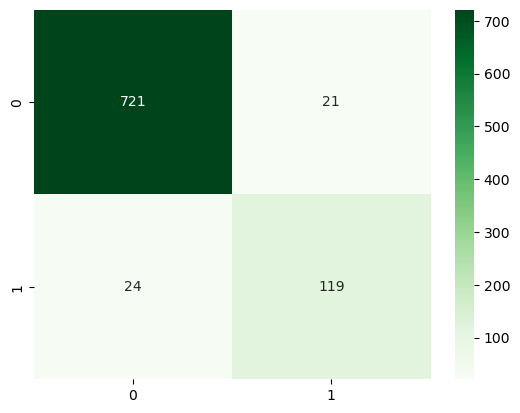

In [18]:
RF_model = grid_rf.fit(X_train, y_train)
pred_RF = grid_rf.predict(X_test)
print(accuracy_score(y_test, pred_RF))
print(classification_report(y_test, pred_RF))
sns.heatmap(confusion_matrix(y_test, pred_RF), annot=True, cmap = 'Greens', fmt='d')
plt.show()

In [19]:
import shap
model = grid_rf.best_estimator_
explainer = shap.TreeExplainer(model)

In [20]:
shap_values = shap.TreeExplainer(model).shap_values(X)


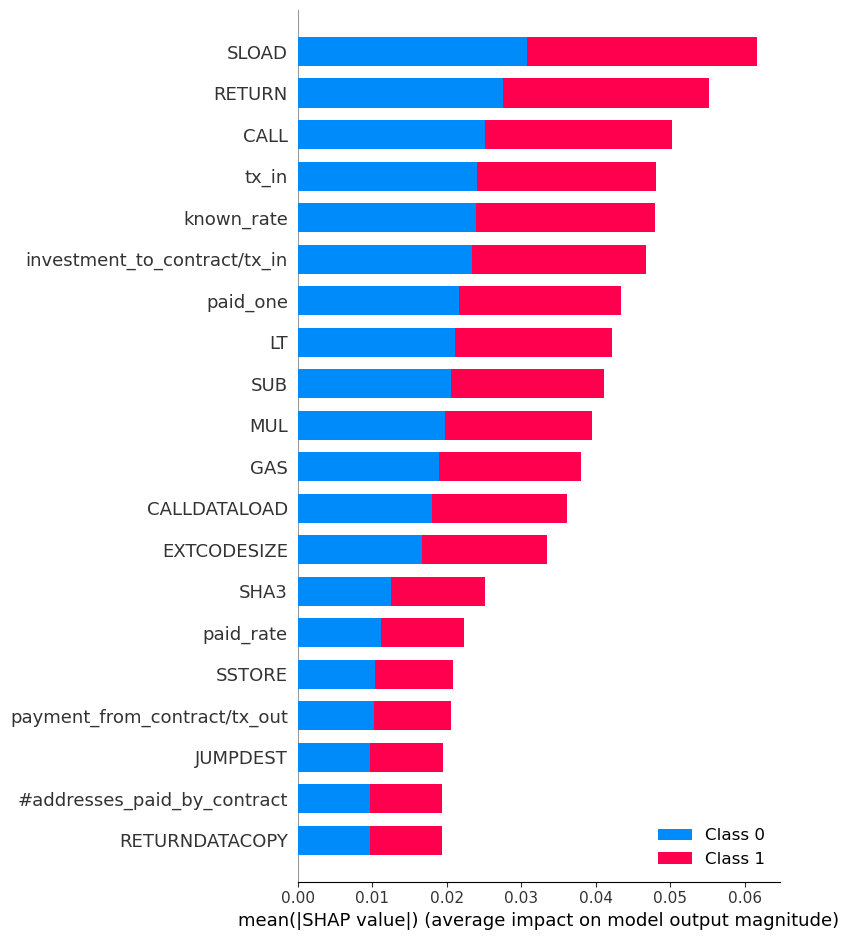

In [21]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [37]:
explainer_k = shap.TreeExplainer(model)

shap_values_k = explainer_k.shap_values(X)

In [38]:
import lime
import lime.lime_tabular

In [39]:
type(X_train)
type(X)

pandas.core.frame.DataFrame

In [40]:
arr_x = X.to_numpy()
arr_x

array([[ 9.5000000e-03,  0.0000000e+00,  5.0000000e+00, ...,
         9.3522000e-01, -1.4079740e+00,  4.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  4.9000000e+01, ...,
         2.9130910e+00,  1.1026540e+00,  5.7000000e+01],
       [ 4.0000001e+02,  8.0400000e+02,  2.7000000e+01, ...,
         9.1865100e-01,  1.7864370e+00,  1.0000000e+01],
       ...,
       [ 0.0000000e+00,  8.5000000e+01,  3.8550000e+03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  5.7000000e+01,  9.6430000e+03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  1.9500000e+02,  9.2570000e+03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]])

In [41]:
explainer = lime.lime_tabular.LimeTabularExplainer(arr_x, feature_names = X.columns)

In [42]:
exp = explainer.explain_instance(
    data_row=X.iloc[1], 
    predict_fn=model.predict_proba
)

exp.show_in_notebook(show_table=True)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [43]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4417    0
4418    0
4419    0
4420    0
4421    0
Name: target, Length: 4422, dtype: int64

In [44]:
X.columns

Index(['balance', 'lifetime', 'tx_in', 'tx_out', 'investment_in',
       'payment_out', 'investment_to_contract/tx_in',
       'payment_from_contract/tx_out', '#addresses_paying_contract',
       '#addresses_paid_by_contract', 'mean_v1', 'sdev_v1', 'mean_v2',
       'sdev_v2', 'paid_rate', 'paid_one', 'percentage_some_tx_in',
       'sdev_tx_in', 'percentage_some_tx_out', 'sdev_tx_out', 'known_rate',
       'owner_gets_eth_Wo_investing', 'owner_gets_eth_investing',
       'owner_no_eth', 'skew_v1', 'skew_v2', 'N_maxpayment'],
      dtype='object')

In [45]:
df

address    balance  lifetime  tx_in  \
0     0x01680dc54cf0942bcabc1d6c955007e180ed4dd1    0.00950         0      5   
1     0xa38feb7b0aaad949a1b99ff516d4e3ea2e317bbf    0.00000         0     49   
2     0x020522bf9b8ed6ff41e2fa6765a17e20e2767d64  400.00001       804     27   
3     0x020e0638aa7d98b40d2a3a7ebd37ebdfc5cba2fd    0.00600        37    442   
4     0x0217495d71d7246205bc1b1039dad814d0c0c192    0.00000         1    144   
...                                          ...        ...       ...    ...   
4417  0xff603f43946a3a28df5e6a73172555d8c8b02386    0.00000        38   9907   
4418  0xffa93aacf49297d51e211817452839052fdfb961    0.00000       111   9907   
4419  0xffd883e94f7a3700aaf81a411bd164ad27acc656    0.00000        85   3855   
4420  0xffe02ee4c69edf1b340fcad64fbd6b37a7b9e265    0.00000        57   9643   
4421  0xffe8196bc259e8dedc544d935786aa4709ec3e64    0.00000       195   9257   

      tx_out  investment_in  payment_out  investment_to_contract/tx_in  \
0         11              4           11                        0.8000   
1        135             48          135                        0.9796   
2         58             25           58                        0.9259   
3        474            422          474                        0.9548   
4        711            135          711                        0.9375   
...      ...            ...          ...                           ...   
4417       0              0            0                        0.0000   
4418       0              0            0                        0.0000   
4419       0              0            0                        0.0000   
4420       0              0            0                        0.0000   
4421       0              0            0                        0.0000   

      payment_from_contract/tx_out  #addresses_paying_contract  ...  \
0                              1.0                           2  ...   
1                              1.0                          11  ...   
2                              1.0                          22  ...   
3                              1.0                          51  ...   
4                              1.0                          62  ...   
...                            ...                         ...  ...   
4417                           0.0                           0  ...   
4418                           0.0                           0  ...   
4419                           0.0                           0  ...   
4420                           0.0                           0  ...   
4421                           0.0                           0  ...   

      percentage_some_tx_out  sdev_tx_out  known_rate  \
0                     1.0000     0.000000      1.0000   
1                     1.0000     0.000000      1.0000   
2                     0.0025    23.000000      1.0000   
3                     0.1622   130.055117      1.0000   
4                     1.0000     0.000000      0.9024   
...                      ...          ...         ...   
4417                  0.0000     0.000000      0.0000   
4418                  0.0000     0.000000      0.0000   
4419                  0.0000     0.000000      0.0000   
4420                  0.0000     0.000000      0.0000   
4421                  0.0000     0.000000      0.0000   

      owner_gets_eth_Wo_investing  owner_gets_eth_investing  owner_no_eth  \
0                               1                         0             0   
1                               0                         1             0   
2                               0                         1             0   
3                               0                         1             0   
4                               0                         0             1   
...                           ...                       ...           ...   
4417                            0                         0             1   
4418                            0    

In [46]:
X_r = df.drop( ['address','target','balance', 'mean_v2', 'skew_v1', 'sdev_v1', 'paid_rate', '#addresses_paid_by_contract', 'payment_out', 'owner_gets_eth_investing'], axis = 1)

In [47]:
X_r

lifetime  tx_in  tx_out  investment_in  investment_to_contract/tx_in  \
0            0      5      11              4                        0.8000   
1            0     49     135             48                        0.9796   
2          804     27      58             25                        0.9259   
3           37    442     474            422                        0.9548   
4            1    144     711            135                        0.9375   
...        ...    ...     ...            ...                           ...   
4417        38   9907       0              0                        0.0000   
4418       111   9907       0              0                        0.0000   
4419        85   3855       0              0                        0.0000   
4420        57   9643       0              0                        0.0000   
4421       195   9257       0              0                        0.0000   

      payment_from_contract/tx_out  #addresses_paying_contract   mean_v1  \
0                              1.0                           2  2.333333   
1                              1.0                          11  7.909091   
2                              1.0                          22  1.500000   
3                              1.0                          51  1.019608   
4                              1.0                          62  8.727273   
...                            ...                         ...       ...   
4417                           0.0                           0  0.000000   
4418                           0.0                           0  0.000000   
4419                           0.0                           0  0.000000   
4420                           0.0                           0  0.000000   
4421                           0.0                           0  0.000000   

         sdev_v2  paid_one  percentage_some_tx_in  sdev_tx_in  \
0       0.020834    1.0000                 1.0000    0.000000   
1       0.450535    0.9091                 1.0000    0.000000   
2     119.764724    0.5909                 0.0050    6.759253   
3       0.334815    0.9216                 0.1892  113.512024   
4       0.838927    0.5968                 2.0000   71.000000   
...          ...       ...                    ...         ...   
4417    0.000000    0.0000                 1.0000  381.029900   
4418    0.000000    0.0000                 0.8829  456.880574   
4419    0.000000    0.0000                 0.9647   25.360087   
4420    0.000000    0.0000                 0.8947  369.700772   
4421    0.000000    0.0000                 0.6872   67.154094   

      percentage_some_tx_out  sdev_tx_out  known_rate  \
0                     1.0000     0.000000      1.0000   
1                     1.0000     0.000000      1.0000   
2                     0.0025    23.000000      1.0000   
3                     0.1622   130.055117      1.0000   
4                     1.0000     0.000000      0.9024   
...                      ...          ...         ...   
4417                  0.0000     0.000000      0.0000   
4418                  0.0000     0.000000      0.0000   
4419                  0.0000     0.000000      0.0000   
4420                  0.0000     0.000000      0.0000   
4421                  0.0000     0.000000      0.0000   

      owner_gets_eth_Wo_investing  owner_no_eth   skew_v2  N_maxpayment  
0                               1             0 -1.407974             4  
1                               0             0  1.102654            57  
2                               0             0  1.786437            10  
3                               0             0  2.398810            49  
4                               0             1 -0.488090           135  
...                           ...           ...       ...           ...  
4417                            0             1  0.000000             0  
4418                            0             1  0.000000             0  
4419                    

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_r, y, test_size=0.2, random_state=42)

In [49]:
print(y_train.value_counts(normalize= True))
print(y_test.value_counts(normalize= True))

0    0.850155
1    0.149845
Name: target, dtype: float64
0    0.838418
1    0.161582
Name: target, dtype: float64


In [50]:
param_dist_RF = {
            'n_estimators':[150, 175, 200, 225, 250],
            'min_samples_split' : [30],
            'criterion':['gini', 'entropy'],
            'class_weight' : [{0:1, 1:5.5}],
            'bootstrap': [True, False]
}

best hyperparameters::  {'bootstrap': True, 'class_weight': {0: 1, 1: 5.5}, 'criterion': 'entropy', 'min_samples_split': 30, 'n_estimators': 200}
best score::  0.8859819709581588
recall score on TR::  0.8811320754716981
precision score on TR::  0.7460063897763578
0.8621468926553673
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       742
           1       0.57      0.58      0.58       143

    accuracy                           0.86       885
   macro avg       0.75      0.75      0.75       885
weighted avg       0.86      0.86      0.86       885



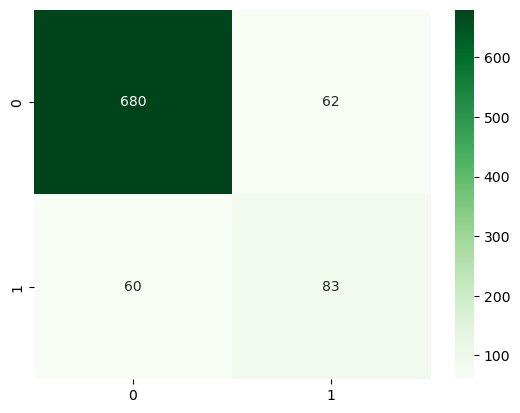

In [51]:
# effettuo la GridSearchCV() per scegliere i migliori iperparametri
grid_rf_n = GridSearchCV(RandomForestClassifier(), param_grid=param_dist_RF, scoring = 'roc_auc',  cv=5, n_jobs=10)
grid_rf_n.fit(X_train, y_train)
y_pred_train_n = grid_rf_n.predict(X_train)
print('best hyperparameters:: ', grid_rf.best_params_)
print('best score:: ', grid_rf.best_score_)
print('recall score on TR:: ', recall_score(y_train, y_pred_train))
print('precision score on TR:: ', precision_score(y_train, y_pred_train))

y_pred_test_n = grid_rf_n.predict(X_test)
print(accuracy_score(y_test, y_pred_test_n))
print(classification_report(y_test, y_pred_test_n))
sns.heatmap(confusion_matrix(y_test, y_pred_test_n), annot=True, cmap = 'Greens', fmt='d')
plt.show()

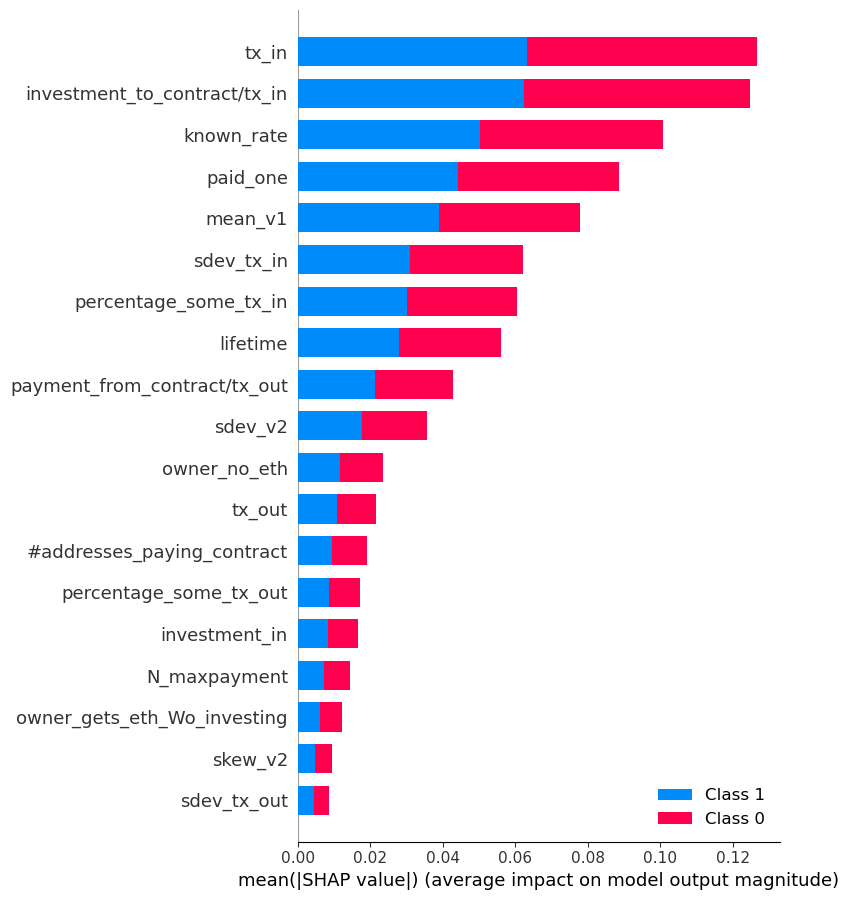

In [52]:
model = grid_rf_n.best_estimator_
explainer = shap.TreeExplainer(model)
shap_values = shap.TreeExplainer(model).shap_values(X_r)
shap.summary_plot(shap_values, X_r, plot_type="bar")

In [53]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.1 MB/s eta 0:00:0000:0100:01m


In [54]:
import xgboost as xgb